In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import pickle
import os

from RMALoaders import *

In [2]:
connectivity_path = Path.home() / 'Desktop' / 'data' / 'connectivity'
path = connectivity_path / 'centroids_projection_energy_hem_id_1_inj_vol_thresh_0.01_target_vol_thresh_0.1_VISam'

In [3]:
filename = 'ipsilateral_centroids_dict_hem_1_inj_vol_thresh_0.01_target_vol_thresh_0.1_VISam.pkl'
with open(path/filename, 'rb') as f: centroids_dict = pickle.load(f)

In [4]:
with open(connectivity_path/'areas_acronyms.pkl', 'rb') as f: areas_acronyms = pickle.load(f)

In [5]:
with open(path/'experiment_list_log.pkl', 'rb') as f: log = pickle.load(f)

In [6]:
print(areas_acronyms)

{795: 'PAG', 223: 'ARH', 731: 'ORBm', 266: 'LSv', 914: 'PD', 207: 'AP', 1049: 'FL', 609: 'SPA', 35: 'III', 425: 'VISpl', 1009: 'fiber tracts', 926: 'ENTm', 38: 'PVH', 1105: 'IA', 59: 'IMD', 302: 'SCs', 390: 'SO', 591: 'CLI', 262: 'RT', 872: 'DR', 101: 'VCO', 1061: 'PPT', 287: 'BAC', 1048: 'GRN', 1084: 'PRE', 30: 'PVa', 564: 'MS', 604: 'NI', 238: 'RPO', 619: 'NLOT', 689: 'VLPO', 378: 'SSs', 985: 'MOp', 409: 'VISl', 88: 'AHN', 362: 'MD', 880: 'DTN', 614: 'TU', 422: 'SPFp', 255: 'AV', 576073699: 'VMPO', 726: 'DG', 978: 'PGRNl', 549009223: 'PC5', 333: 'SH', 27: 'IGL', 184: 'FRP', 361: 'SSp-tr', 131: 'LA', 170: 'LGd', 886: 'RSPv', 746: 'ORBvl', 483: 'MH', 583: 'CLA', 23: 'AAA', 706: 'OP', 677: 'VISC', 1037: 'POST', 133: 'PVpo', 484682470: 'ProS', 966: 'EPv', 353: 'SSp-n', 1025: 'PRM', 1093: 'PRNc', 151: 'AOB', 763: 'OV', 280: 'B', 369: 'SSp-ul', 830: 'DMH', 765: 'x', 507: 'MOB', 231: 'AT', 356: 'PST', 839: 'DMX', 549009215: 'P5', 647: 'COAp', 463: 'CA3', 536: 'CEA', 206: 'RM', 612: 'NLL', 1

In [27]:
l = np.array([[areas_acronyms[area_id], area_id, centroids_dict[area_id][-1]] for area_id in centroids_dict.keys()])
l

array([['ORBm', '731', '38.81764008447669'],
       ['VISpl', '425', '11.39665559141695'],
       ['VISl', '409', '136.2049408811814'],
       ['AV', '255', '27.6066266443591'],
       ['LGd', '170', '53.654837212054'],
       ['RSPv', '886', '64.73910558561995'],
       ['ORBvl', '746', '132.62698290780543'],
       ['RSPagl', '894', '13.797468595597845'],
       ['AUDpo', '1027', '441.973862516376'],
       ['VISp', '385', '70.67805908698594'],
       ['LDT', '162', '4.18178833038788'],
       ['MOs', '993', '13.39450599759822'],
       ['TEa', '541', '5.67925480112076'],
       ['VISa', '312782546', '287.5206577109843'],
       ['RSPd', '879', '36.4887439180757'],
       ['VISli', '312782574', '94.54589205865337'],
       ['SI', '342', '43.589037375743416'],
       ['NDB', '596', '53.0231518702732'],
       ['AUDp', '1002', '299.418019294861'],
       ['LP', '218', '565.9653536803895'],
       ['VISrl', '417', '197.75259704057643'],
       ['VISal', '402', '265.1719789564647'],
    

In [9]:
# 1027: 'AUDpo'
# 1002: 'AUDp'

print(centroids_dict[1002])
print(centroids_dict[1027])

[7640, 2731, 781, 299.418019294861]
[8310, 2285, 1501, 441.973862516376]


In [10]:
log.keys()

dict_keys(['step_1_collected_from_web_metadata', 'step_2_overlapping_injection_and_target_structures_removed', 'step_3_hemisphere_id_1_only_selected', 'step_4_zero_value_projection_experiments_removed', 'step_5_injection_volume_thresholding_done', 'step_6_separated_by_projection', 'step_7_projection_volume_thresholding_done', 'step_8_data_used_for_centroids_computation_zero_experiment_areas_removed'])

In [23]:
# AUDpo
print(log['step_7_projection_volume_thresholding_done'][0]['ipsilateral_experiment_list'][1027])
print(log['step_8_data_used_for_centroids_computation_zero_experiment_areas_removed'][0]['ipsilateral_xyz_coordinates'][1027])

[554421791, 606100558, 579203888, 587345518, 563179067, 566730846, 556922099]
{554421791: [8110, 2290, 1840, 1292.13683894428], 606100558: [8380, 2150, 1100, 929.829720351346], 579203888: [8730, 3070, 1470, 161.805188499349], 587345518: [8510, 2400, 1260, 378.624620599796], 563179067: [8550, 2140, 1470, 205.137414532017], 566730846: [8310, 2070, 1790, 110.855528487084], 556922099: [8480, 2500, 1860, 15.4277262007604]}


In [24]:
# AUDp
print(log['step_7_projection_volume_thresholding_done'][0]['ipsilateral_experiment_list'][1002])
print(log['step_8_data_used_for_centroids_computation_zero_experiment_areas_removed'][0]['ipsilateral_xyz_coordinates'][1002])

[562671482, 576332845, 569994739]
{562671482: [7570, 2720, 780, 616.620730882367], 576332845: [7710, 2740, 730, 254.584881011162], 569994739: [8580, 2930, 1310, 27.048445991054]}


In [42]:
average_projection_values = np.array(list(centroids_dict.values()))[:,3]

(array([1., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([ 27.04844599,  86.00567448, 144.96290297, 203.92013146,
        262.87735995, 321.83458844, 380.79181693, 439.74904541,
        498.7062739 , 557.66350239, 616.62073088]),
 <BarContainer object of 10 artists>)

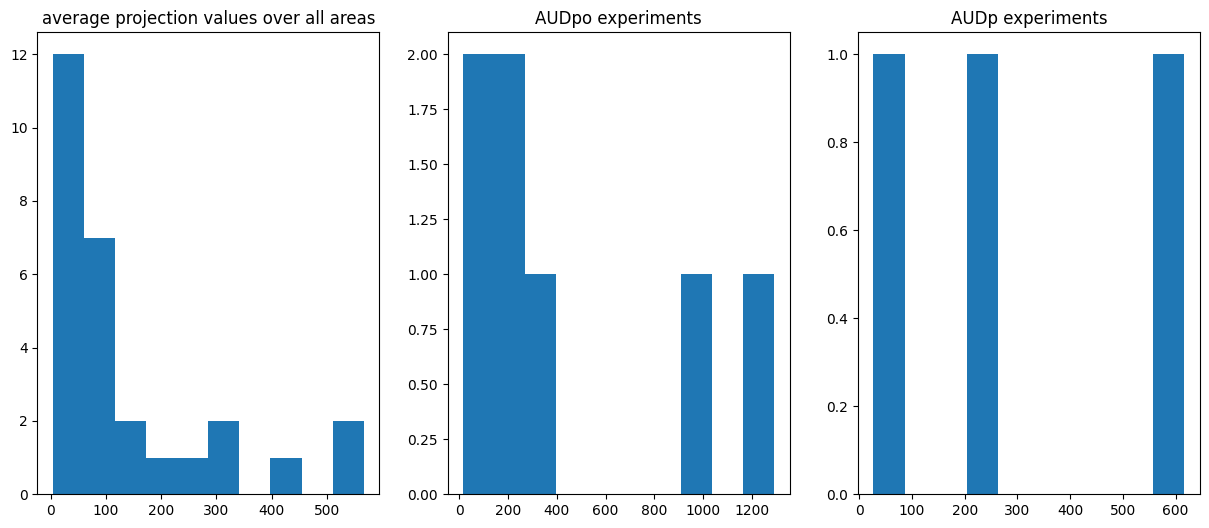

In [62]:
fig, axes = plt.subplots(1,3,figsize=(15,6))

axes[0].set_title('average projection values over all areas')
axes[0].hist(average_projection_values)

axes[1].set_title('AUDpo experiments')
vals = np.array(list(log['step_8_data_used_for_centroids_computation_zero_experiment_areas_removed'][0]['ipsilateral_xyz_coordinates'][1027].values()))[:,3]
axes[1].hist(vals)

axes[2].set_title('AUDp experiments')
vals = np.array(list(log['step_8_data_used_for_centroids_computation_zero_experiment_areas_removed'][0]['ipsilateral_xyz_coordinates'][1002].values()))[:,3]
axes[2].hist(vals)